In [1]:
import math

import pandas
from fpgrowth_py import fpgrowth
import pandas as pd
import re
import json
import spacy
import seaborn as sns
from spacy import displacy
from flashtext import KeywordProcessor
import ahocorasick
import nltk
from concurrent.futures import ThreadPoolExecutor
from enum import Enum

pathprefix = r"D:\Code Working Area\Jupyter\knowledge-graph-for-stakeholder-risks-detection-in-mega-infrastructure-projects\ExcelData"
jsfile = pathprefix+"\\Transactions.json"

project = pathprefix+"\\Gg.csv"
risk = pathprefix+"\\Risk_Simplified.xlsx"
stake = pathprefix+"\\expansive.csv"

project1 = pathprefix+"\\newTitle_Project.xlsx"
risk0 = pathprefix+"\\RiskFinal.xlsx"
stake1 = pathprefix+"\\New_StakeHolder_Abstract.xlsx"

stake2 = pathprefix+"\\second_layer_stakeholder.xlsx"

In [2]:
# !pip install regex
# !pip install spacy
# !pip install fpgrowth_py
# !pip install pandas
# !pip install seaborn
# !pip install openpyxl
# !python -m spacy install en_core_web_sm
stake2

'D:\\Code Working Area\\Jupyter\\knowledge-graph-for-stakeholder-risks-detection-in-mega-infrastructure-projects\\ExcelData\\second_layer_stakeholder.xlsx'

In [2]:
pj = pd.read_csv(project, sep = ",")
risk1 = pd.read_excel(risk)
stk = pd.read_csv(stake, sep = ",")

prj = pd.read_excel(project1, index_col=None)
risk2 = pd.read_excel(risk0, index_col=None)
stk1 = pd.read_excel(stake1, index_col=None)
stk2 = pd.read_excel(stake2, index_col=None)
stk2.dropna(inplace=True)

en = spacy.load('en_core_web_sm')
stopwords = en.Defaults.stop_words

C:\Users\jqi22\AppData\Local\Temp\ipykernel_17588\2812288643.py:1: DtypeWarning: Columns (3,7,8,12,13,18,27,28,29,30,31,38,39,40,41,42,43,44,45,50,51,53,54,59,63,64,65,67) have mixed types. Specify dtype option on import or set low_memory=False.
  pj = pd.read_csv(project, sep = ",")


In [4]:
prj

,Article
0,gas project
1,Construction project
2,mitigation project
3,pipeline project
4,afforestation project
...,...
5196,AEMS project
5197,pia project
5198,burner project
5199,vermicomposting project


In [3]:
# get the target text from original dataset to match
nproject = pd.DataFrame(pj["Article Title"])
nrisk = pd.DataFrame(risk1["Abstract"])
nstack = pd.DataFrame(stk["Abstract"])

nrisk.dropna(inplace=True, how="any")

stk1.name = stk1.name.str.lower()

In [4]:
def reload_dashes(droped: int)->pd.DataFrame:
    dashes = pd.read_excel(pathprefix+"\\adjustment.xlsx")
    dashes = dashes[dashes.frequency > droped].Words.to_list()
    return set(dashes)

stopwords |= reload_dashes(2)
stopwords |= set([str(num) for num in range(1,100)])

# manually add the words to the stopwords
possiblew = {"connections", "efficacy", "life", "This"}
stopwords |= possiblew

In [5]:
risk2.Abstract=risk2.Abstract.astype(str)
stk2.Abstract=stk2.Abstract.astype(str)

In [25]:
prjkey_list=prj["Article"].to_list()
riskey_list=risk2["Abstract"].to_list()
stkey_list=list(set(stk2["Abstract"].to_list()))

### Data pre-process finished

In [9]:
keypro=KeywordProcessor()
keypro.add_keywords_from_list(prjkey_list+riskey_list+stkey_list)

In [10]:
def abst(args:str):
    return keypro.extract_keywords(args)
res=nrisk.Abstract.apply(abst)
res=res.apply(lambda x: list(set(x)))
temp=res.explode(ignore_index=True).dropna(how="any")

In [11]:
tempres=temp.value_counts().to_frame()
tempres["words"]=tempres.index
tempres.reset_index(drop=True, inplace=True)
tempres["word type"]=tempres.words.apply(lambda row: nltk.pos_tag(nltk.word_tokenize(row))[0][1])

### First section of extraction keyword finished
#### Usually suggested to comment out if already with test dataset

In [18]:
# usually be considered as temp console, using for debug and test
prj

,Article
0,gas project
1,Construction project
2,mitigation project
3,pipeline project
4,afforestation project
...,...
5196,AEMS project
5197,pia project
5198,burner project
5199,vermicomposting project


In [8]:
test_file=pd.read_csv(r"D:\Code Working Area\Jupyter\knowledge-graph-for-stakeholder-risks-detection-in-mega-infrastructure-projects\ExcelData\Result_0.001_0.5.csv")

In [10]:
test_file=test_file.replace(regex=["{", "}", "'"], value="")

In [12]:
def Warp_fpgrowth(minSup:float, confident:float, dataset_name: str):
    ...

In [13]:
def acmachine():
    """achieve the fast retrieve goal by AC auto machine"""
    ...

In [15]:
# Originally be devised for initialize the keyword for later integration
class keyword():
    prj, stk, risk="project", "stakeholder", "risk"
    prjw: KeywordProcessor=None
    stkw: KeywordProcessor=None
    riskw: KeywordProcessor=None

    def re_estabilishment(self):
        if not self.prjw and not self.stkw and not self.riskw:
            ...


In [16]:
def single_plot(left: KeywordProcessor, val: list):
    existence: int=0
    for keyword in val:
        if left.extract_keywords(keyword): existence+=1
    return existence

In [17]:
def row_retrieve(name: str, left: KeywordProcessor, comparison: pd.DataFrame):
    extradata: list=[]
    for val in comparison.iterrows():
        ori, dest = val[1][0:2]
        ori,dest=ori.split(", "), dest.split(", ")
        ori,dest=single_plot(left, ori), single_plot(left, dest)
        extradata.append([ori, dest])
    comparison[[name+" on start", name+" on destination"]] = pd.DataFrame(extradata)
    return comparison

In [26]:
def test_retrieve(test_file: pd.DataFrame):
    temp=row_retrieve("prj", prjkeyword, test_file)
    temp=row_retrieve("stk", stkeyw, temp)
    return row_retrieve("risk", riskeyw, temp)

In [27]:
# test running process
prjkeyword, stkeyw, riskeyw=KeywordProcessor(), KeywordProcessor(), KeywordProcessor()
prjkeyword.add_keywords_from_list(prjkey_list)
stkeyw.add_keywords_from_list(stkey_list)
riskeyw.add_keywords_from_list(riskey_list)
temp=test_retrieve(test_file)

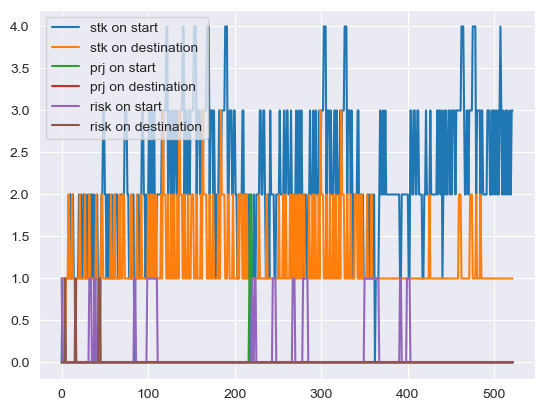

In [30]:
plots=temp.drop(columns=["p1", "p2", "probability"])
plots.plot();

In [33]:
temp.to_csv(r"../attempt.csv", index=False)

In [32]:
data_summary(temp)

,convertion rate
sp2r,18.754098
pr2s,0.057946
p2rs,0.004167


In [ ]:
def plot_generation(df:pd.DataFrame):
    ...

In [31]:
def data_summary(df: pd.DataFrame):
    sp2r=(df["stk on start"].sum()+df["prj on start"].sum())/df["risk on start"].sum()
    pr2s=(df["risk on start"].sum()+df["prj on start"].sum())/df["stk on start"].sum()
    p2rs=df["prj on start"].sum()/(df["risk on start"].sum()+df["stk on start"].sum())
    return pd.DataFrame([sp2r, pr2s, p2rs], index=["sp2r", "pr2s", "p2rs"], columns=["convertion rate"])

In [ ]:
def split_hor(df: pd.DataFrame, number: int=10) -> list:
    if df.empty(): raise Exception("dataframe is empty.")
    interval=math.floor(df.shape[1]/number)
    return [df.loc[val*interval:val*(interval+1), ('p1', "p2", 'probability')] for val in range(0, number)]

### multithreading support

In [ ]:
def falshretrieve(left: KeywordProcessor, comparison: list):
    with ThreadPoolExecutor() as executor:
        result=executor.map(row_retrieve, left, comparison)


In [83]:
def initial_keyw():
    riskw, projectw, stkw=KeywordProcessor(),KeywordProcessor(),KeywordProcessor()
    keywords=keyword()
    keywords.riskw, keywords.prjw=riskw.add_keywords_from_list(riskw), projectw.add_keywords_from_list(prjkeyw)
    keywords.stkw= stkw.add_keywords_from_list(stkkeyw)
    return keywords
    # return [riskw.add_keywords_from_list(riskw),
    #         projectw.add_keywords_from_list(prjkeyw),
    #         stkw.add_keywords_from_list(stkkeyw)]

In [ ]:
def outer(comparison: pd.DataFrame):
    """
    multithreading must involve in the last
    :param comparison:
    :return:
    """
    keywords=initial_keyw()
    flash=split_hor(comparison, 8)
    for processor in keywords:
        df=falshretrieve(processor, flash)
    return df

In [71]:
def check_in():
    warpfp=Warp_fpgrowth(0.01, 0.2, "res")
    callAC=acmachine()

    ...

In [75]:
if __name__=="__main__":
    keys=initial_keyw()


0         [TIME, grouting risk, PURPOSE, Dynamic risk, M...
1         [TAR, ON, Safety, And risk, uses risk, Operati...
2         [ON, Safety, The risk, Resource, To risk, Unde...
3         [AIM, Aggregate risk, Paramount, Planning, The...
4         [Weibull, ON, Networks, COST, And risk, Differ...
                                ...                        
125092    [TIMES, Elsevier Ltd., Characteristics, Differ...
125093    [ON, National, Utilities, Elsevier Inc., Post,...
125094    [ON, complete risk, The risk, Economics, With ...
125095    [Sustainability, ON, epidemic risk, The risk, ...
125096    [investor risk, ON, Credit risk, EU, Resulting...
Name: Abstract, Length: 120420, dtype: object